<a href="https://colab.research.google.com/github/manojcodes93/Online-Retail-EDA/blob/main/Online_Retail_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("/content/Online Retail dataset.xlsx")

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
data_copy = data.copy()

data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data_missing = data_copy.isnull().sum()/len(data_copy)*100
data_missing

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


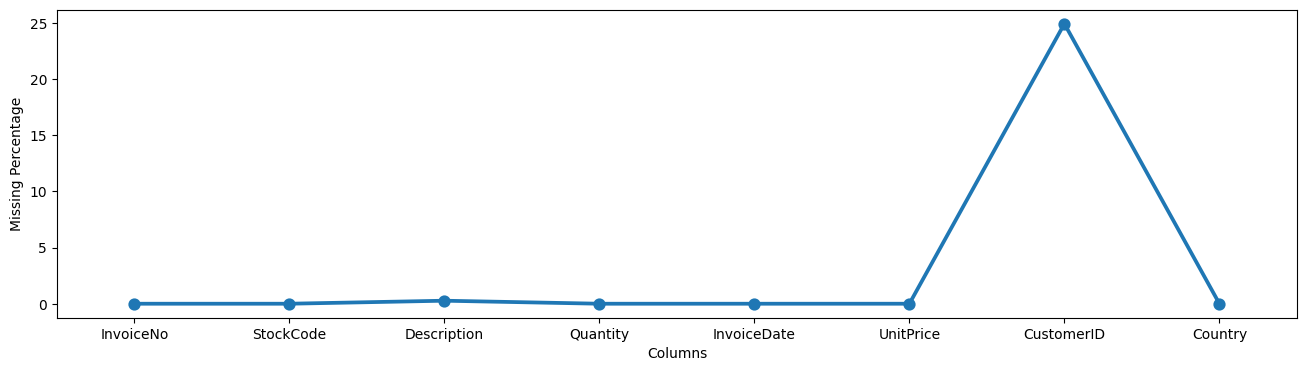

In [ ]:
data_missing_plot = pd.DataFrame({
    "Columns" : data_copy.columns,
    "Missing Percentage" : data_missing
})

plt.figure(figsize = (16,4))
sns.pointplot(x = "Columns", y = "Missing Percentage", data = data_missing_plot)
plt.show()

In [ ]:
# Handling missing data

data_copy["CustomerID"] = data_copy["CustomerID"].fillna(method = "ffill")

/tmp/ipython-input-10-862870824.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_copy["CustomerID"] = data_copy["CustomerID"].fillna(method = "ffill")


In [ ]:
data_copy.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Grouping quantity and unit price as Revenue as we don't have any y varibale
data_copy["Revenue"] = data_copy["Quantity"] * data_copy["UnitPrice"]
data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Converting date into month

data_copy["InvoiceDate"] = pd.to_datetime(data_copy["InvoiceDate"])

data_copy["Month"] = data_copy["InvoiceDate"].dt.month_name()

data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December


In [ ]:
# converting date into days

data_copy["InvoiceDate"] = pd.to_datetime(data_copy["InvoiceDate"])

data_copy["Day"] = data_copy["InvoiceDate"].dt.day_name()

data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday


In [ ]:
data_copy["Quantity"].value_counts()

,count
Quantity,
1,148227
2,81829
12,61063
6,40868
4,38484
...,...
-355,1
-155,1
1404,1


In [ ]:
data_copy.Revenue.max()

168469.6

In [ ]:
bins = [0, 32000, 64000, 96000, 128000, 160000, data_copy["Revenue"].max() + 1]

labels = [
    '0–32k',
    '32k–64k',
    '64k–96k',
    '96k–128k',
    '128k–160k',
    '160k+'
]

In [ ]:
data_copy["Revenue_group"] = pd.cut(
    data_copy["Revenue"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(data_copy["Revenue_group"].value_counts().sort_index())

Revenue_group
0–32k        532616
32k–64k           1
64k–96k           1
96k–128k          0
128k–160k         0
160k+             1
Name: count, dtype: int64


In [ ]:
filtered_data = data_copy[data_copy["Revenue"] <= 32001]
filtered_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Day,Revenue_group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,0–32k
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,0–32k
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k


In [ ]:
last_edge = filtered_data["Revenue"].max() + 1

bins = [0, 4000, 8000, 12000, 16000, 20000, 24000, 28000, 32001]

labels = [
    '0–4k',
    '4k–8k',
    '8k–12k',
    '12k–16k',
    '16k–20k',
    '20k–24k',
    '24k–28k',
    '28k–32k'
]

if last_edge > 32001:
    bins.append(last_edge)
    labels.append('32k+')

In [ ]:
filtered_data["Revenue_group"] = pd.cut(
    filtered_data["Revenue"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(filtered_data["Revenue_group"].value_counts().sort_index())

Revenue_group
0–4k       532597
4k–8k          16
8k–12k          2
12k–16k         1
16k–20k         0
20k–24k         0
24k–28k         0
28k–32k         0
Name: count, dtype: int64


/tmp/ipython-input-21-1484620455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Revenue_group"] = pd.cut(


In [ ]:
filtered_data = data_copy[data_copy["Revenue"] <= 4001]
filtered_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Day,Revenue_group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,0–32k
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,0–32k
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k


In [ ]:
filtered_data.Revenue.max()

3949.32

In [ ]:
filtered_data["Revenue_group"] = pd.cut(
    filtered_data["Revenue"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(filtered_data["Revenue_group"].value_counts().sort_index())

Revenue_group
0–4k       532597
4k–8k           0
8k–12k          0
12k–16k         0
16k–20k         0
20k–24k         0
24k–28k         0
28k–32k         0
Name: count, dtype: int64


/tmp/ipython-input-24-1484620455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Revenue_group"] = pd.cut(


In [ ]:
filtered_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Day,Revenue_group
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,December,Friday,0–4k
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,December,Friday,0–4k
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December,Friday,0–4k
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December,Friday,0–4k
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,December,Friday,0–4k


/tmp/ipython-input-26-702011823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= filtered_data, x = "Revenue_group", order = filtered_data["Revenue_group"].cat.categories, palette = "dark")


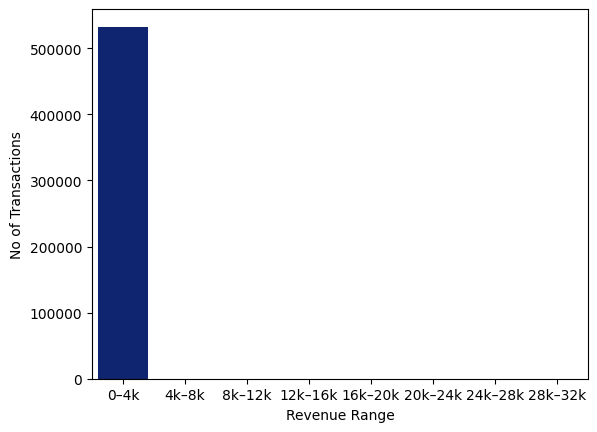

In [ ]:
sns.countplot(data= filtered_data, x = "Revenue_group", order = filtered_data["Revenue_group"].cat.categories, palette = "dark")

plt.xlabel("Revenue Range")
plt.ylabel("No of Transactions")
plt.show()

In [ ]:
# Reduce the range again
filtered_data = data_copy[data_copy["Revenue"] <= 801]
filtered_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Day,Revenue_group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,0–32k
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,0–32k
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k


In [ ]:
bins = [0, 150, 300, 450, 600, 750, 900]

labels = [
    '0–150',
    '150–300',
    '300–450',
    '450–600',
    '600–750',
    '750–900'
]


In [ ]:
filtered_data["Revenue_group"] = pd.cut(
    filtered_data["Revenue"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(filtered_data["Revenue_group"].value_counts().sort_index())

Revenue_group
0–150      524456
150–300      5625
300–450      1178
450–600       490
600–750       260
750–900        36
Name: count, dtype: int64


/tmp/ipython-input-29-1484620455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Revenue_group"] = pd.cut(


/tmp/ipython-input-30-702011823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= filtered_data, x = "Revenue_group", order = filtered_data["Revenue_group"].cat.categories, palette = "dark")


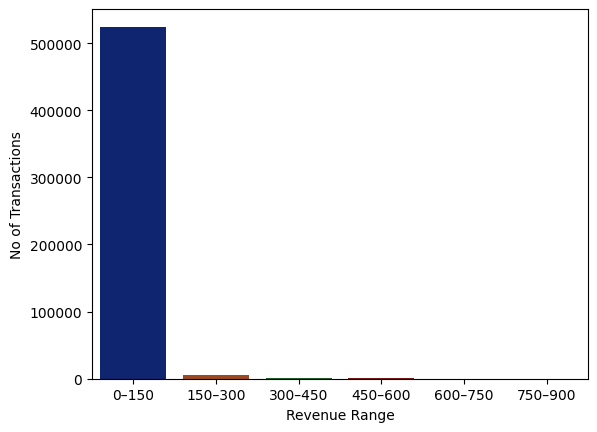

In [ ]:
sns.countplot(data= filtered_data, x = "Revenue_group", order = filtered_data["Revenue_group"].cat.categories, palette = "dark")

plt.xlabel("Revenue Range")
plt.ylabel("No of Transactions")
plt.show()

In [ ]:
# Reduce the range again
filtered_data = data_copy[data_copy["Revenue"] <= 451]
filtered_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Day,Revenue_group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,0–32k
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,0–32k
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k


In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450]

labels = [
    '0–50',
    '50–100',
    '100-150',
    '150-200',
    '200–250',
    '250–300',
    '300–350',
    '350–400',
    '400-450'
]


In [ ]:
filtered_data["Revenue_group"] = pd.cut(
    filtered_data["Revenue"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(filtered_data["Revenue_group"].value_counts().sort_index())

Revenue_group
0–50       501529
50–100      17536
100-150      5391
150-200      3279
200–250      1589
250–300       757
300–350       507
350–400       441
400-450       230
Name: count, dtype: int64


/tmp/ipython-input-33-1484620455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Revenue_group"] = pd.cut(


/tmp/ipython-input-34-30930479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= filtered_data, x = "Revenue_group", order = filtered_data["Revenue_group"].cat.categories, palette = "dark")


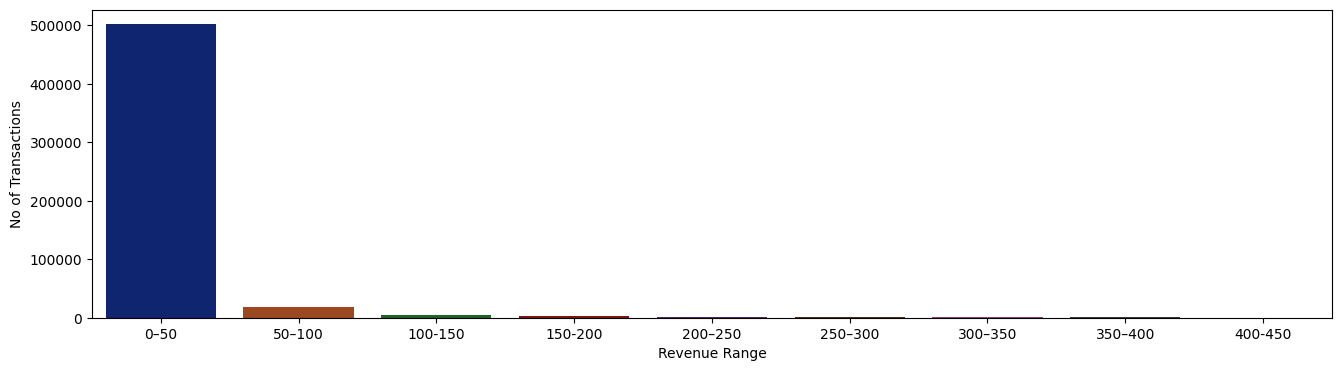

In [ ]:
plt.figure(figsize = (16,4))
sns.countplot(data= filtered_data, x = "Revenue_group", order = filtered_data["Revenue_group"].cat.categories, palette = "dark")

plt.xlabel("Revenue Range")
plt.ylabel("No of Transactions")
plt.show()

In [ ]:
# Reduce the range again
filtered_data = data_copy[data_copy["Revenue"] <= 51]
filtered_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Day,Revenue_group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,0–32k
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,0–32k
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,0–32k


In [ ]:
bins = [0, 10, 20, 30, 40, 51]

labels = [
    '0–10',
    '10–20',
    '20–30',
    '30–40',
    '40–50'
]


In [ ]:
filtered_data["Revenue_group"] = pd.cut(
    filtered_data["Revenue"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(filtered_data["Revenue_group"].value_counts().sort_index())

Revenue_group
0–10     275613
10–20    156699
20–30     43447
30–40     17497
40–50      9940
Name: count, dtype: int64


/tmp/ipython-input-37-1484620455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Revenue_group"] = pd.cut(


/tmp/ipython-input-38-3449734120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= filtered_data, x = "Revenue_group", order = filtered_data["Revenue_group"].cat.categories, palette = "dark")


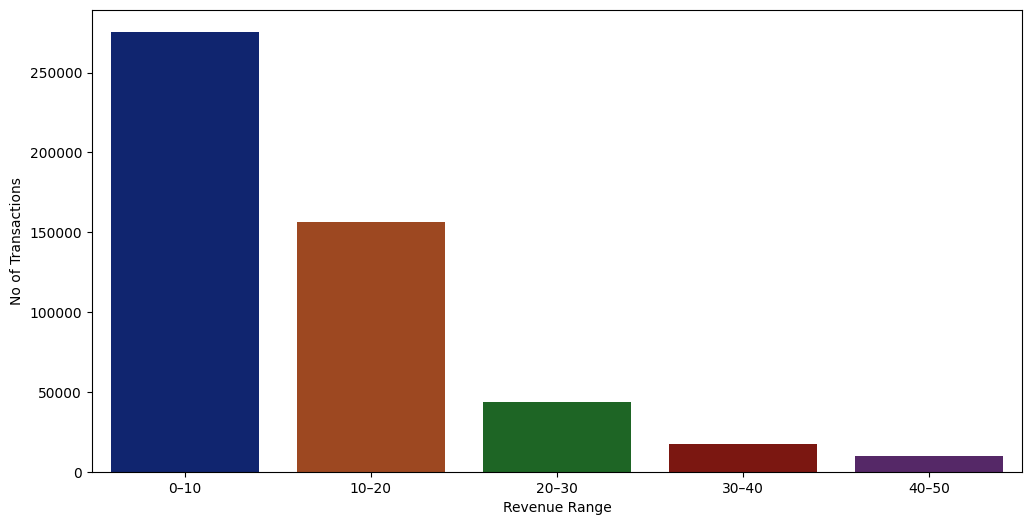

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data= filtered_data, x = "Revenue_group", order = filtered_data["Revenue_group"].cat.categories, palette = "dark")

plt.xlabel("Revenue Range")
plt.ylabel("No of Transactions")
plt.show()

In [ ]:
filtered_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Day,Revenue_group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,10–20
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,20–30
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,20–30
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,20–30
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,20–30


In [ ]:
filtered_data.Description.value_counts()

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1925
JUMBO BAG RED RETROSPOT,1847
REGENCY CAKESTAND 3 TIER,1585
LUNCH BAG RED RETROSPOT,1519
SET OF 3 CAKE TINS PANTRY DESIGN,1369
...,...
????missing,1
PINK FEATHER CHRISTMAS DECORATION,1
"PAPER CRAFT , LITTLE BIRDIE",1


In [ ]:
filtered_data.drop(columns = ["InvoiceNo", "StockCode", "InvoiceDate", "UnitPrice"], inplace = True)
filtered_data.head()

/tmp/ipython-input-41-449734038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns = ["InvoiceNo", "StockCode", "InvoiceDate", "UnitPrice"], inplace = True)


,Description,Quantity,CustomerID,Country,Revenue,Month,Day,Revenue_group
0,WHITE HANGING HEART T-LIGHT HOLDER,6,17850.0,United Kingdom,15.30,December,Wednesday,10–20
1,WHITE METAL LANTERN,6,17850.0,United Kingdom,20.34,December,Wednesday,20–30
2,CREAM CUPID HEARTS COAT HANGER,8,17850.0,United Kingdom,22.00,December,Wednesday,20–30
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,17850.0,United Kingdom,20.34,December,Wednesday,20–30
4,RED WOOLLY HOTTIE WHITE HEART.,6,17850.0,United Kingdom,20.34,December,Wednesday,20–30


<Axes: xlabel='Country', ylabel='count'>

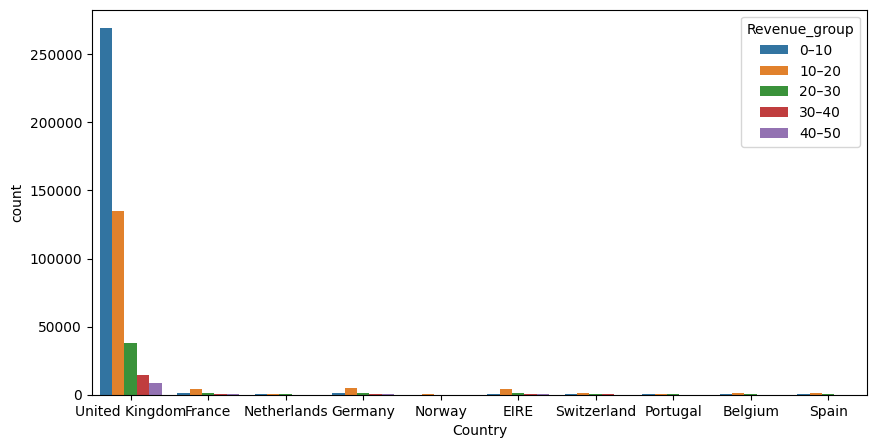

In [ ]:
# Univariate Analysis
# 1. X = Country, y = Revenue_group

top_countries = filtered_data["Country"].value_counts().head(10).index
filtered_top = filtered_data[filtered_data["Country"].isin(top_countries)]

plt.figure(figsize = (10,5))

sns.countplot(data = filtered_top, x = "Country", hue = "Revenue_group")

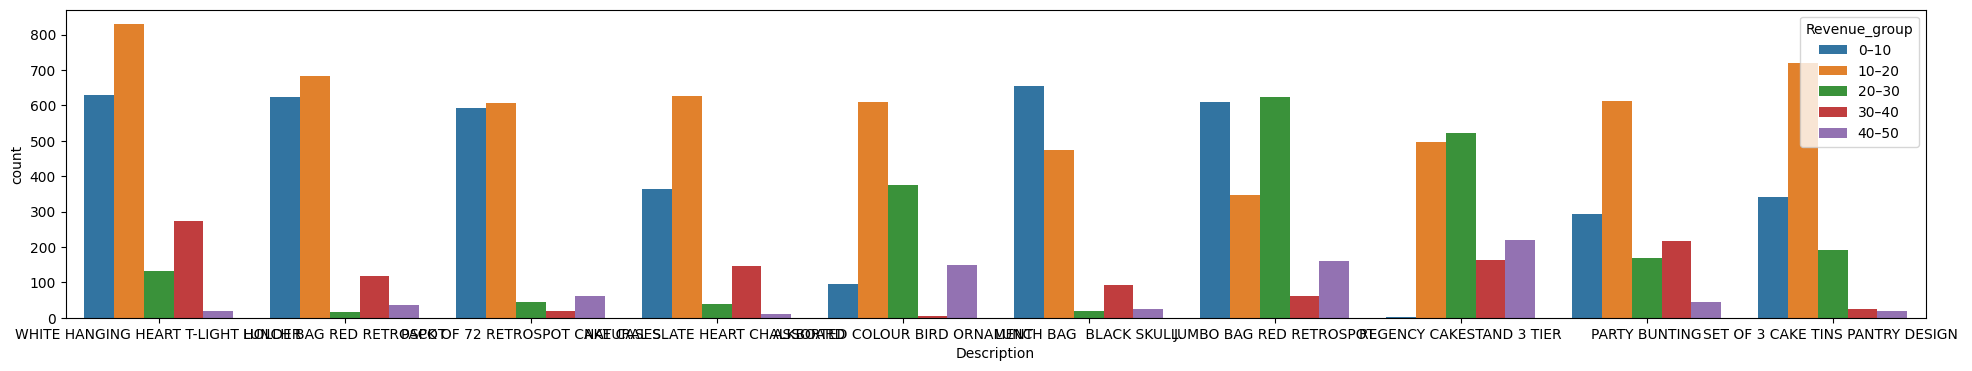

In [ ]:
# Univariate Analysis
# 2. X = Description, y = Revenue_group

top_countries = filtered_data["Description"].value_counts().head(10).index
filtered_top = filtered_data[filtered_data["Description"].isin(top_countries)]

plt.figure(figsize = (24,4))

sns.countplot(data = filtered_top, x = "Description", hue = "Revenue_group")
plt.show()

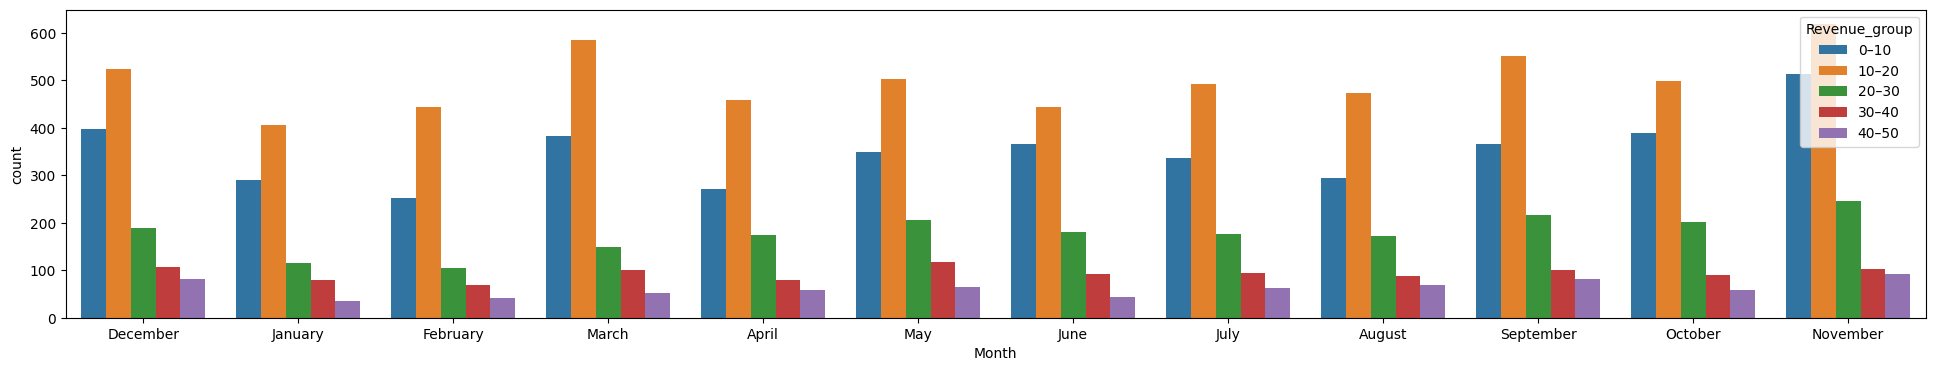

In [ ]:
# Univariate Analysis
# 3. X = Month, y = Revenue_group
plt.figure(figsize = (24,4))

sns.countplot(data = filtered_top, x = "Month", hue = "Revenue_group")
plt.show()

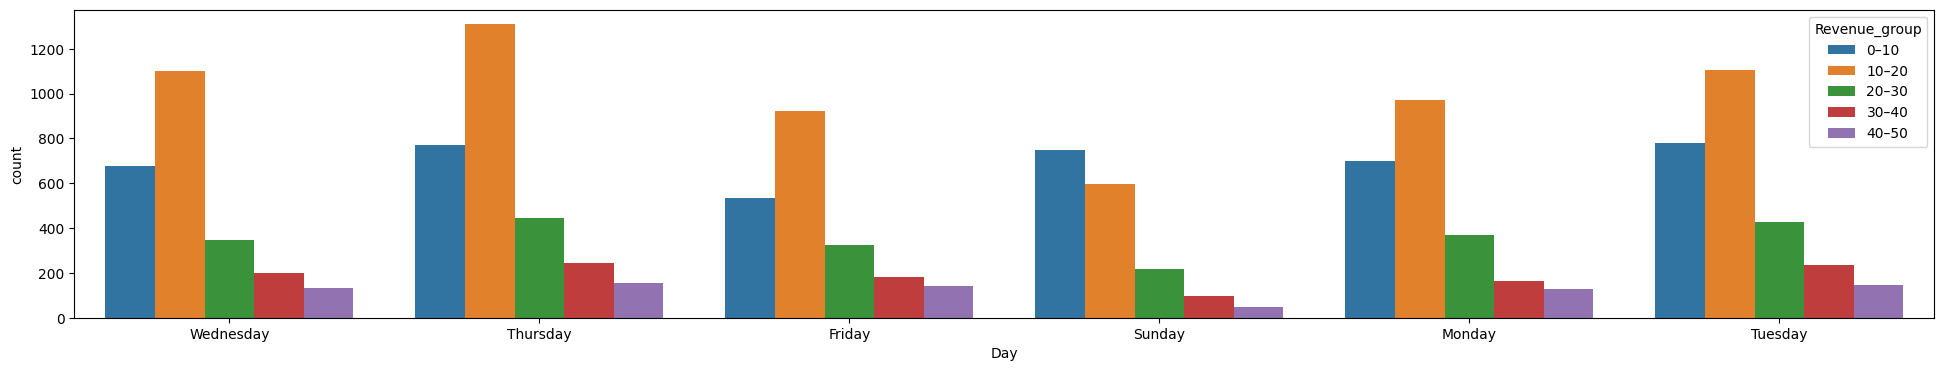

In [ ]:
# Univariate Analysis
# 4. X = Day, y = Revenue_group
plt.figure(figsize = (24,4))

sns.countplot(data = filtered_top, x = "Day", hue = "Revenue_group")
plt.show()

## **1. Revenue Group by Country**
- Most customers are from the United Kingdom.

- So, spend more on ads and fast delivery for people in the UK.

- Most of them spend very little money (0–10 units).

- Other countries like France, Germany, etc., have very few customers.

- Give offers to make them buy more items together(like "Buy 3 get 1 free").

## **2. Revenue Group by Product**

- Products like T-light holder, lunch bags, and cake tins are bought the most.

- Most people spend between 10 and 20 on these items.

- Very few people spend more than 30.

- Try to sell (0-10 units) products in combos with other products.

- Most people spend less than ₹10.

- Only a few spend more than ₹30–₹40.

- So don’t buy or keep too many high-price items in stock.



## **3. Revenue Group by Month**

- Use busy months well (Sept–Nov)

- People buy more in September to November. Maybe because of festivals or holidays.

- Give big offers, discounts, and festive sales during these months

## **4. Revenue Group by Day of the Week**

- People shop the most on Thursday.

- Sunday has the least shopping.

- Post offers and ads on Wednesday night or Thursday morning.

- People buy less on Sundays. So try Sunday-only discounts to make them buy on that day too.

In [ ]:
filtered_data.head()

,Description,Quantity,CustomerID,Country,Revenue,Month,Day,Revenue_group
0,WHITE HANGING HEART T-LIGHT HOLDER,6,17850.0,United Kingdom,15.30,December,Wednesday,10–20
1,WHITE METAL LANTERN,6,17850.0,United Kingdom,20.34,December,Wednesday,20–30
2,CREAM CUPID HEARTS COAT HANGER,8,17850.0,United Kingdom,22.00,December,Wednesday,20–30
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,17850.0,United Kingdom,20.34,December,Wednesday,20–30
4,RED WOOLLY HOTTIE WHITE HEART.,6,17850.0,United Kingdom,20.34,December,Wednesday,20–30


In [ ]:
# Top 5 Countries by Revenue
top_countries = filtered_data.groupby("Country")["Revenue"].sum().sort_values(ascending=False)
print(top_countries.head())

Country
United Kingdom    4152225.124
Germany            141291.480
France             125889.800
EIRE               109993.660
Belgium             35071.270
Name: Revenue, dtype: float64


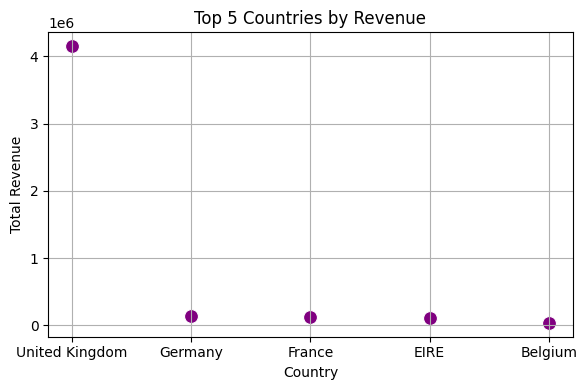

In [ ]:
top_countries = filtered_data.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=top_countries.index, y=top_countries.values, color='purple', s=100)
plt.title("Top 5 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Top 5 Customers by Revenue
top_customers = filtered_data.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).head()
print(top_customers)


CustomerID
14911.0    98833.71
17841.0    41265.53
14096.0    38832.71
12748.0    33546.85
14298.0    32593.94
Name: Revenue, dtype: float64


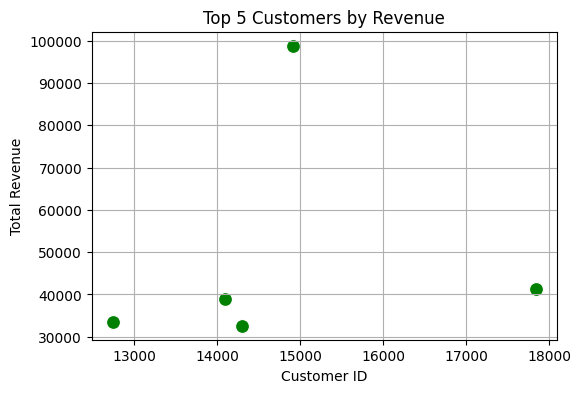

In [ ]:
top_customers = filtered_data.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).head()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=top_customers.index, y=top_customers.values, color='green', s=100)
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


In [ ]:
#Average Revenue Per Transaction
avg_revenue = filtered_data["Revenue"].mean()
print("Average Revenue per Transaction:", avg_revenue)


Average Revenue per Transaction: 9.313004265482373


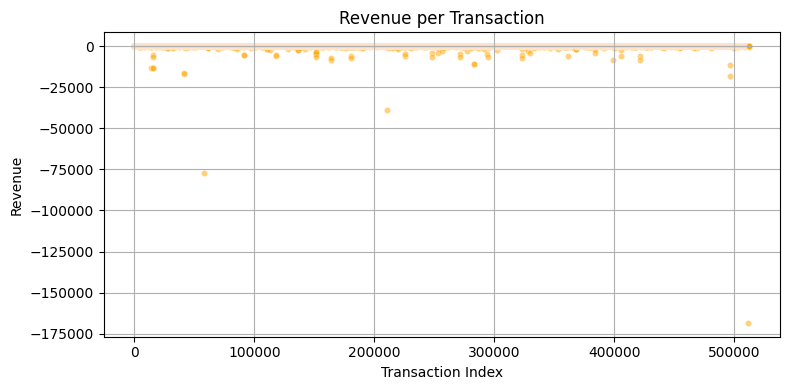

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data = filtered_data, x=range(len(filtered_data)), y="Revenue", alpha=0.5, color="orange", s=20)
plt.title("Revenue per Transaction")
plt.xlabel("Transaction Index")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


**Insights:**

- Focus more on UK customers and analyze what's working there — maybe run similar campaigns in other countries.

- A few customers (especially the one around Customer ID 15000) are bringing in a very high amount of revenue.

- These customers are high-value. You should give them special attention, maybe through loyalty rewards or early-access offers.

- Most of the transactions have positive revenue. However, there are a few transactions with very large negative revenue, which are outliers.

- These negative revenues might be returns or data issues. It's important to investigate and clean them to avoid misleading results.

#Conclusion

##These are some of the quick insights from this exercise:

- Low-priced products are bought in higher quantities.

- United Kingdom brings in the most revenue by far.

- A few top customers are responsible for a large share of purchases.

- November and December are the best months for sales — likely holiday-driven